In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
# O '\s*;\s*' tira os espaços antes dos campos (o '?' e 'salary-classification' tinham)
training = pd.read_csv("../training.csv", sep = '\s*;\s*', engine = 'python', na_values = '?')
test = pd.read_csv("../test.csv", sep = '\s*;\s*', engine = 'python', na_values = '?')

In [28]:
training.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
training.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


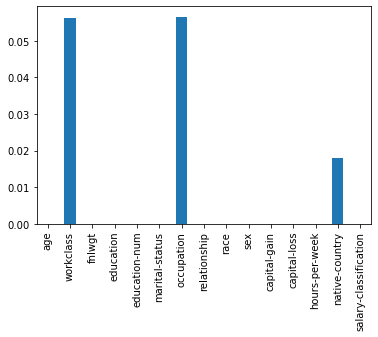

In [30]:
percent_missing = training.isnull().sum() / len(training)
percent_missing.plot(kind = 'bar')
plt.show()

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

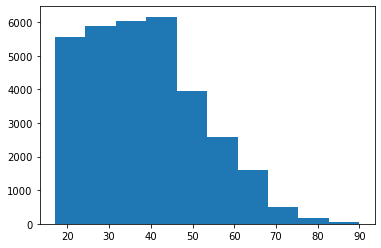

In [31]:
plt.hist(x = training['age'])

In [32]:
#training['age'] = pd.qcut(training['age'], q = 4)
training = training.rename(columns = {'age':'ageBinned'})

#test['age'] = pd.qcut(test['age'], q = 4)
test = test.rename(columns = {'age':'ageBinned'})

In [33]:
training['ageBinned'] = training['ageBinned'].astype('category').cat.codes
test['ageBinned'] = test['ageBinned'].astype('category').cat.codes

#### Tornar algumas variáveis em categóricas

In [34]:
training['workclass'] = training['workclass'].astype('category')
training['education'] = training['education'].astype('category')
training['marital-status'] = training['marital-status'].astype('category')
training['occupation'] = training['occupation'].astype('category')
training['relationship'] = training['relationship'].astype('category')
training['race'] = training['race'].astype('category')
training['native-country'] = training['native-country'].astype('category')
training['sex'] = training['sex'].astype('category')
training['salary-classification'] = training['salary-classification'].astype('category')

test['workclass'] = test['workclass'].astype('category')
test['education'] = test['education'].astype('category')
test['marital-status'] = test['marital-status'].astype('category')
test['occupation'] = test['occupation'].astype('category')
test['relationship'] = test['relationship'].astype('category')
test['race'] = test['race'].astype('category')
test['native-country'] = test['native-country'].astype('category')
test['sex'] = test['sex'].astype('category')
test['salary-classification'] = test['salary-classification'].astype('category')

In [35]:
trainingNBGaussian = training.copy()
testNBGaussian = test.copy()

In [36]:
trainingNBGaussian['education'] = trainingNBGaussian['education'].astype('category').cat.codes
trainingNBGaussian['occupation'] = trainingNBGaussian['occupation'].astype('category').cat.codes
trainingNBGaussian['relationship'] = trainingNBGaussian['relationship'].astype('category').cat.codes
trainingNBGaussian['workclass'] = trainingNBGaussian['workclass'].astype('category').cat.codes
trainingNBGaussian['sex'] = trainingNBGaussian['sex'].astype('category').cat.codes
trainingNBGaussian['native-country'] = trainingNBGaussian['native-country'].astype('category').cat.codes
trainingNBGaussian['race'] = trainingNBGaussian['race'].astype('category').cat.codes
trainingNBGaussian['salary-classification'] = trainingNBGaussian['salary-classification'].astype('category').cat.codes
trainingNBGaussian['marital-status'] = trainingNBGaussian['marital-status'].astype('category').cat.codes

testNBGaussian['education'] = testNBGaussian['education'].astype('category').cat.codes
testNBGaussian['occupation'] = testNBGaussian['occupation'].astype('category').cat.codes
testNBGaussian['relationship'] = testNBGaussian['relationship'].astype('category').cat.codes
testNBGaussian['workclass'] = testNBGaussian['workclass'].astype('category').cat.codes
testNBGaussian['sex'] = testNBGaussian['sex'].astype('category').cat.codes
testNBGaussian['native-country'] = testNBGaussian['native-country'].astype('category').cat.codes
testNBGaussian['race'] = testNBGaussian['race'].astype('category').cat.codes
testNBGaussian['salary-classification'] = testNBGaussian['salary-classification'].astype('category').cat.codes
testNBGaussian['marital-status'] = testNBGaussian['marital-status'].astype('category').cat.codes

trainingNBGaussian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ageBinned              32561 non-null  int8 
 1   workclass              32561 non-null  int8 
 2   fnlwgt                 32561 non-null  int64
 3   education              32561 non-null  int8 
 4   education-num          32561 non-null  int64
 5   marital-status         32561 non-null  int8 
 6   occupation             32561 non-null  int8 
 7   relationship           32561 non-null  int8 
 8   race                   32561 non-null  int8 
 9   sex                    32561 non-null  int8 
 10  capital-gain           32561 non-null  int64
 11  capital-loss           32561 non-null  int64
 12  hours-per-week         32561 non-null  int64
 13  native-country         32561 non-null  int8 
 14  salary-classification  32561 non-null  int8 
dtypes: int64(5), int8(10)
memory usage: 

In [37]:
trainingNBGaussian

,ageBinned,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,22,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,33,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,21,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,36,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,11,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,23,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,41,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,5,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


# Modelos Preditivos

## Naive Bayes

#### Naive Bayes Gaussiano 
(com a transformação de todas variáveis a categóricas)

In [38]:
train_x = trainingNBGaussian.drop(columns = 'salary-classification')
train_y = trainingNBGaussian['salary-classification']

test_x = testNBGaussian.drop(columns = 'salary-classification')
test_y = testNBGaussian['salary-classification']

In [39]:
trainingNBGaussian.head()

,ageBinned,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,22,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,33,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,21,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,36,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,11,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


#### Training

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import QuantileTransformer

pipeline = make_pipeline(QuantileTransformer(output_distribution = 'normal'), GaussianNB())
pipeline.fit(train_x, train_y)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal')),
                ('gaussiannb', GaussianNB())])

In [41]:
testNBGaussian.head()

,ageBinned,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,8,3,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,21,3,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,11,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,27,3,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,1,-1,103497,15,10,4,-1,3,4,0,0,0,30,37,0


In [42]:
predictions = pipeline.predict(test_x)
predictions

array([0, 1, 0, ..., 1, 1, 1], dtype=int8)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predictions, digits = 3))

              precision    recall  f1-score   support

           0      0.879     0.859     0.869     12435
           1      0.575     0.617     0.595      3846

    accuracy                          0.802     16281
   macro avg      0.727     0.738     0.732     16281
weighted avg      0.807     0.802     0.804     16281



## K Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=1)

In [45]:
pred = knn.predict(test_x)
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred, digits = 3))

[[10108  2327]
 [ 2092  1754]]
              precision    recall  f1-score   support

           0      0.829     0.813     0.821     12435
           1      0.430     0.456     0.443      3846

    accuracy                          0.729     16281
   macro avg      0.629     0.634     0.632     16281
weighted avg      0.734     0.729     0.731     16281



In [47]:
error_rate = []

# Will take some time
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))

Text(0, 0.5, 'Error Rate')

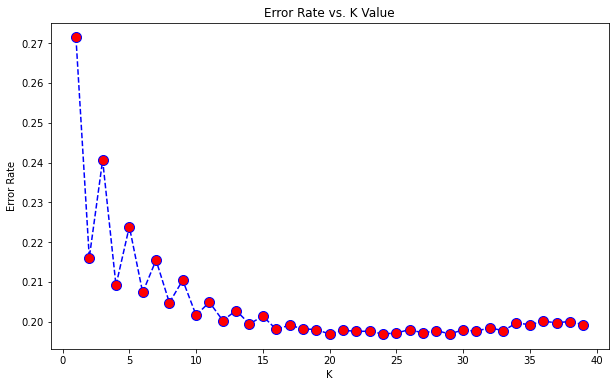

In [48]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### O erro é menor à volta do K = 14
* K = 1

In [49]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(train_x, train_y)
pred = knn.predict(test_x)

print('WITH K = 1')
print('\n')
print(confusion_matrix(test_y, pred))
print('\n')
print(classification_report(test_y, pred, digits = 3))

WITH K = 1


[[10108  2327]
 [ 2092  1754]]


              precision    recall  f1-score   support

           0      0.829     0.813     0.821     12435
           1      0.430     0.456     0.443      3846

    accuracy                          0.729     16281
   macro avg      0.629     0.634     0.632     16281
weighted avg      0.734     0.729     0.731     16281



* K = 14

In [50]:
knn = KNeighborsClassifier(n_neighbors = 16)

knn.fit(train_x, train_y)
pred = knn.predict(test_x)

print('WITH K = 20')
print('\n')
print(confusion_matrix(test_y, pred))
print('\n')
print(classification_report(test_y, pred, digits = 3))

WITH K = 20


[[12241   194]
 [ 3031   815]]


              precision    recall  f1-score   support

           0      0.802     0.984     0.884     12435
           1      0.808     0.212     0.336      3846

    accuracy                          0.802     16281
   macro avg      0.805     0.598     0.610     16281
weighted avg      0.803     0.802     0.754     16281



## Random Forest Trees

In [51]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(train_x, train_y);

In [52]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)# Calculate the absolute errors

In [53]:
print(predictions)

[0 0 1 ... 1 0 1]


In [54]:
print(classification_report(test_y, predictions, digits = 3))

              precision    recall  f1-score   support

           0      0.885     0.934     0.909     12435
           1      0.739     0.607     0.666      3846

    accuracy                          0.856     16281
   macro avg      0.812     0.770     0.787     16281
weighted avg      0.850     0.856     0.851     16281



## Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state = 42)

decisionTree.fit(train_x, train_y)

DecisionTreeClassifier(random_state=42)

In [56]:
predictions = decisionTree.predict(test_x)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [57]:
print(classification_report(test_y, predictions, digits = 3))

              precision    recall  f1-score   support

           0      0.877     0.873     0.875     12435
           1      0.595     0.603     0.599      3846

    accuracy                          0.809     16281
   macro avg      0.736     0.738     0.737     16281
weighted avg      0.810     0.809     0.810     16281



## Adaboost com Decision Tree
* Diminui a variância e o bias do modelo

In [58]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators = 1000,
                         learning_rate = 1,
                         random_state = 42)

# Train Adaboost Classifer
model = abc.fit(train_x, train_y)

#Predict the response for test dataset
predictions = model.predict(test_x)

predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [59]:
print(classification_report(test_y, predictions, digits = 3))

              precision    recall  f1-score   support

           0      0.891     0.948     0.919     12435
           1      0.788     0.625     0.697      3846

    accuracy                          0.872     16281
   macro avg      0.840     0.787     0.808     16281
weighted avg      0.867     0.872     0.866     16281



## Support Vector Machines

In [60]:
from sklearn.svm import SVC

In [61]:
svc_model = SVC()

In [62]:
svc_model.fit(train_x, train_y)

SVC()

In [63]:
predictions = svc_model.predict(test_x)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [64]:
print(classification_report(test_y, predictions, digits = 3))

              precision    recall  f1-score   support

           0      0.793     0.998     0.884     12435
           1      0.964     0.155     0.267      3846

    accuracy                          0.799     16281
   macro avg      0.878     0.577     0.575     16281
weighted avg      0.833     0.799     0.738     16281



## Stacking

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [66]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors = 16)),
    ('rf', RandomForestClassifier(n_estimators = 200, random_state = 42)),
    ('ada', AdaBoostClassifier(n_estimators = 200, learning_rate = 1, random_state = 42))
    ]

clf = StackingClassifier(
    estimators = estimators,
    final_estimator = LogisticRegression(),
    cv = 10
)

In [67]:
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)

In [68]:
print(classification_report(test_y, predictions, digits = 3))

              precision    recall  f1-score   support

           0      0.878     0.942     0.909     12435
           1      0.754     0.578     0.655      3846

    accuracy                          0.856     16281
   macro avg      0.816     0.760     0.782     16281
weighted avg      0.849     0.856     0.849     16281

